The Recursive Randomized-Selection Algorithm with a single pivot splits the original n-long array into three sub-arrays, 
*   First sub-array contains all elements of the array that are strictly less than p
*   Second sub-array contains all elements of the original array that are exactly equal to p 
*   Third sub-array contains all elements that are strictly greater than p


We are looking for the k-th smallest element in the original array depending on the value of k and the lengths of the three sub-arrays, we identify one of these three sub-arrays to recurse on for the next round. 


We consider the version of the Recursive Randomized-Selection Algorithm that uses m-many pivots. Just with the single-pivot case described above, for each pivot we would have a candidate sub-array that contains the element we want to find. In a sense, we have m-many candidate sub-arrays (one from each of the m-many pivots) that contains the element we want. 


The algorithm then recurses on the sub-array with the smallest-length. This suggests that the average-running time can be made smaller by making m larger. But having a large value of m comes incurs a larger cost of comparisons before the appropriate sub-array can be identified for the next round of recursion. This lead us to hypothesize that there is really no practical benefit to using multiple pivots. At least, there will be a point beyond which using more pivots will be more computationally time-consuming over the single-pivot case.  

#Pivots =  1 ; Mean-Regressor's slope =  3.8168452387254585e-07 ; Std-Dev-Regressor's slope =  -1.9547950550568672e-07
#Pivots =  2 ; Mean-Regressor's slope =  6.038956016366482e-07 ; Std-Dev-Regressor's slope =  1.5405934371057971e-07
#Pivots =  3 ; Mean-Regressor's slope =  8.530073129022458e-07 ; Std-Dev-Regressor's slope =  8.731877877637623e-08
#Pivots =  4 ; Mean-Regressor's slope =  9.771026421979209e-07 ; Std-Dev-Regressor's slope =  1.0078521844131564e-07
#Pivots =  5 ; Mean-Regressor's slope =  1.2097508139759721e-06 ; Std-Dev-Regressor's slope =  1.1587065786801248e-07
#Pivots =  6 ; Mean-Regressor's slope =  1.3719722527441907e-06 ; Std-Dev-Regressor's slope =  1.2901199208209863e-07
#Pivots =  7 ; Mean-Regressor's slope =  1.7304762021581983e-06 ; Std-Dev-Regressor's slope =  4.934152748601781e-07
#Pivots =  8 ; Mean-Regressor's slope =  1.911548771177047e-06 ; Std-Dev-Regressor's slope =  5.456021154069686e-07
#Pivots =  9 ; Mean-Regressor's slope =  2.017059984189491e-06

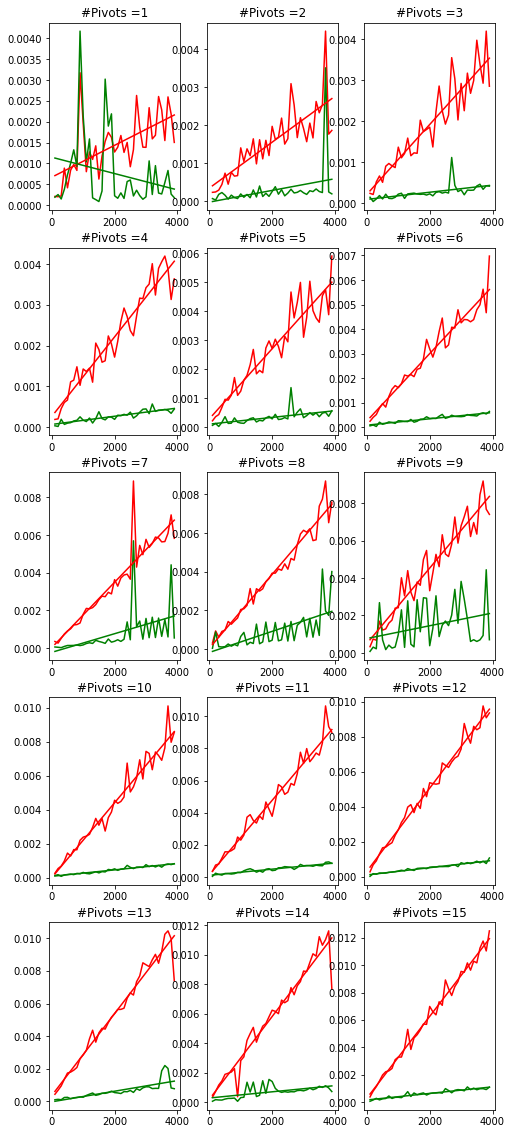

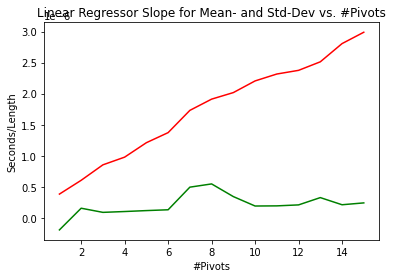

Sensitivity of the Slope of the Linear Regressor of the Mean to the #Pivots    =  1.8082776975943684e-07
Sensitivity of the Slope of the Linear Regressor of the Std-Dev to the #Pivots =  1.8560467165221554e-08


In [1]:
import sys
import argparse
import random
import numpy as np 
import time
import math
import matplotlib.pyplot as plt

sys.setrecursionlimit(3000)

# sort the array and pick the k-th smallest element from the sorted-array
def sort_and_select(current_array, k):
    # sort the array
    sorted_current_array = np.sort(current_array)
    return sorted_current_array[k-1]

def randomized_select_with_multipe_pivots (current_array, k, no_of_pivots) :
    if len(current_array)<no_of_pivots: 
      random.seed(23)
      pivots = np.random.choice(current_array, no_of_pivots, replace=True) # if no of pivots is  greater than the array size, sample on replacement
    else:
      random.seed(23)
      pivots = random.sample(current_array, no_of_pivots) # else sample unique pivots
    #print(current_array)
    #print(no_of_pivots)
    subarrays, arraysizes, new_ks = [], [], []
    for pivot in pivots:
        low_array = [e for e in current_array if e < pivot]
        pivot_eq_array = [e for e in current_array if e==pivot]
        high_array = [e for e in current_array if e > pivot]
        
        if k < len(low_array):
            subarrays.append(low_array)       # Appending the suitable array for each pivot
            arraysizes.append(len(low_array)) # Appending the corresponding size of the array
            new_ks.append(k)                  # k will be the same since array size is greater than the pivot position
        elif k < len(low_array) + len(pivot_eq_array):
            return pivot_eq_array[0]
        else:
            subarrays.append(high_array)              # Appending the suitable array for each pivot
            arraysizes.append(len(high_array))        # Appending the corresponding size of the array
            new_ks.append(k-len(low_array)-len(pivot_eq_array)) # k= difference of k from the sum of the low & pivot arrays since array size is lesser than pivot position
    smallest_of_all_idx = np.argmin(arraysizes)
    new_curr_array = subarrays[smallest_of_all_idx]
    new_k = new_ks[smallest_of_all_idx]
    randomized_select_with_multipe_pivots (current_array=new_curr_array, k=new_k, no_of_pivots=no_of_pivots) # recurse on the smallest array

# Maximum #pivots
max_no_of_pivots = 15

# Number of Trials
number_of_trials = 1000

# We are going to see if there is any observable difference in the slope of the Linear Regressor
# for the Mean (resp. Standard-Deviation) of the Running Time 
# and the slope of standard-deviation-regressor as the number of pivots are increased
slope_of_mean_regressor_as_a_function_of_no_of_pivots = []
slope_of_std_dev_regressor_as_a_function_of_no_of_pivots = []

fig = plt.figure(figsize=(8, 20))

# try #pivots = 1,2,3,4 and see if having more pivots is helping with the run-time
for number_of_pivots in range(1, max_no_of_pivots+1) :
    
    # arrays containing mean- and std-dev of running time as a function of 
    # array size starting from 100 to 4000 in steps of 100
    mean_running_time = []
    std_dev_running_time = []
        
    # cycle through a bunch of array sizes, where "k" is randomly chosen
    for j in range(1, 40) :
        array_size = 100*j
        # let us pick k to be (close to) the median 
        k = math.ceil(array_size/2)
        # fill the array with random values
        my_array = [random.randint(1,100*array_size) for _ in range(array_size)]

        # run a bunch of random trials and get the algorithm's running time
        running_time = []
        for i in range(1, number_of_trials) :
            t1 = time.time()
            answer1 = randomized_select_with_multipe_pivots(my_array,k,number_of_pivots)
            t2 = time.time()
            running_time.extend([t2-t1])

        mean_running_time.extend([np.mean(running_time)])
        std_dev_running_time.extend([np.std(running_time)])

    # linear fit (cf. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html)
    t = np.arange(100, 4000, 100)
    z1 = np.polyfit(t, mean_running_time, 1)
    p1 = np.poly1d(z1)
    z2 = np.polyfit(t, std_dev_running_time, 1)
    p2 = np.poly1d(z2)
    
    print("#Pivots = ", number_of_pivots, "; Mean-Regressor's slope = ", z1[0], "; Std-Dev-Regressor's slope = ", z2[0])
    slope_of_mean_regressor_as_a_function_of_no_of_pivots.extend([z1[0]])
    slope_of_std_dev_regressor_as_a_function_of_no_of_pivots.extend([z2[0]])
    
    # plot the mean and standard deviation of the running-time as a function of array-size    
    axs = fig.add_subplot(5, 3, number_of_pivots)
    plt.plot(t, mean_running_time, 'r', t, std_dev_running_time, 'g', t, p1(t), 'r-', t, p2(t), 'g-')
    axs.set_title('#Pivots =' + str(number_of_pivots))

plt.savefig("fig2.pdf", bbox_inches='tight')
plt.show()
                                 
# plot the slope of the two regressors as a function of #pivots
x = [i for i in range(1, max_no_of_pivots+1)]
plt.plot(x, slope_of_mean_regressor_as_a_function_of_no_of_pivots, 'r', x, slope_of_std_dev_regressor_as_a_function_of_no_of_pivots, 'g')
plt.title('Linear Regressor Slope for Mean- and Std-Dev vs. #Pivots')
plt.xlabel('#Pivots')
plt.ylabel('Seconds/Length')
plt.savefig("fig1.pdf", bbox_inches='tight')
plt.show()

# Checking if increasing the number of pivots is helping with the runtime in any significant manner... 
z3 = np.polyfit(x, slope_of_mean_regressor_as_a_function_of_no_of_pivots, 1)
z4 = np.polyfit(x, slope_of_std_dev_regressor_as_a_function_of_no_of_pivots, 1)
print("Sensitivity of the Slope of the Linear Regressor of the Mean to the #Pivots    = ", z3[0])
print("Sensitivity of the Slope of the Linear Regressor of the Std-Dev to the #Pivots = ", z4[0])


# Conclusion:
1. Usually, as the number of pivots increases, the cost of computation should go down as a convex function
     i.e. as pivot increases, the cost decreases and then at some point increases again.
2. In this scenario, we have tried out multiple pivots ranging from 1 to 15.
3. From the final graphs, we see that there is convex graph and the cost is increasing strictly as a function of # of pivots (m)
4. For this problem, cost does not decrease as a function of m and no optimal m.